In [ ]:
!pip install qiskit ipywidgets
!pip install pylatexenc

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 14.4 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=aae7d4f69d527df96381f7cc3acc2543e6a2dce3b59373bad74ffc026bb7ccf1
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built py

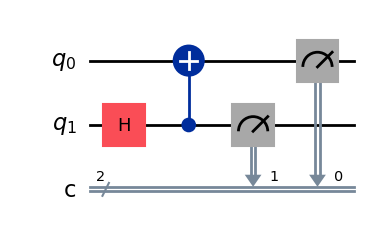

In [ ]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2, 2)
qc.h(1)
qc.cx(1, 0)
qc.measure([1, 0], [1, 0])
qc.draw('mpl')

In [ ]:
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 54.7 MB/s eta 0:00:00


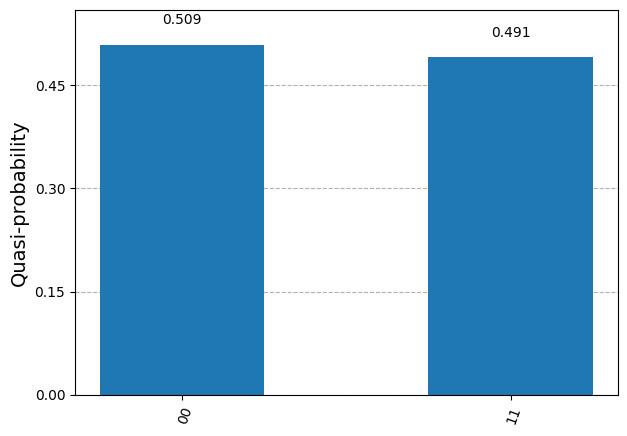

In [ ]:

from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.visualization import plot_distribution

simulator_aer = AerSimulator(seed_simulator=42)
qc_aer = transpile(qc, backend=simulator_aer)
result_ideal = simulator_aer.run(qc_aer, shots=1024).result()
counts_ideal = result_ideal.get_counts()
plot_distribution(counts_ideal)

### Depolarizing Noise

Depolarizing noise represents a quantum operation where, with probability (p), the state of the qubits is replaced by the maximally mixed state:

$
\rho \rightarrow (1 - p) \rho + \frac{p}{d} \mathbb{I}
$

where ($
\rho
$) is the density matrix of the qubit(s), (d) is the dimension of the Hilbert space (for (n) qubits, ($
d = 2^n
$)), and ($
\mathbb{I}
$) is the identity matrix.

In this simulation, the noise model applies a depolarizing error with probability (p = 0.1) to all 2-qubit CX gates, reflecting realistic noise behavior in quantum devices.


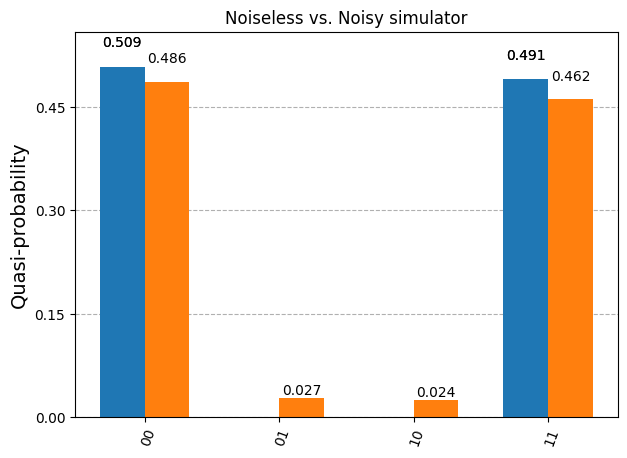

In [ ]:
from qiskit_aer import noise

prob = 0.1
error = noise.depolarizing_error(prob, 2)
noise_model = noise.NoiseModel()
noise_model.add_all_qubit_quantum_error(error, ['cx'])
basis_gates = noise_model.basis_gates
result_noisy = simulator_aer.run(qc,
                                 shots=1024,
                                 noise_model=noise_model,
                                 basis_gates=basis_gates).result()

counts_noisy = result_noisy.get_counts()
plot_distribution([counts_ideal, counts_noisy], title='Noiseless vs. Noisy simulator')

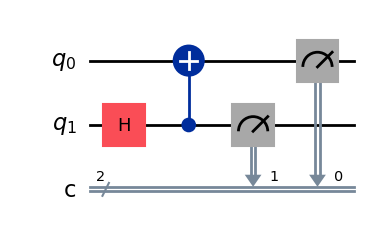

In [ ]:
from qiskit.primitives import StatevectorSampler, StatevectorEstimator

qc.draw('mpl')

In [ ]:
sampler = StatevectorSampler()
job_simulator = simulator_aer.run(qc, shots=1024)

In [ ]:
job_sampler = sampler.run(qc, shots=1024)

ValueError: An invalid Sampler pub-like was given (<class 'qiskit._accelerate.circuit.CircuitInstruction'>). If you want to run a single circuit, you need to wrap it with `[]` like `sampler.run([circuit])` instead of `sampler.run(circuit)`.

In [ ]:
job_sampler = sampler.run([qc], shots=1024)

In [ ]:
result_sampler = job_sampler.result()

In [ ]:
print(counts_ideal)

{'11': 503, '00': 521}


In [ ]:
counts_sampler = result_sampler.get_counts()

AttributeError: 'PrimitiveResult' object has no attribute 'get_counts'

In [ ]:
print(result_sampler)

PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=1024, num_bits=2>)), metadata={'shots': 1024, 'circuit_metadata': {}})], metadata={'version': 2})


In [ ]:
print(result_sampler[0])

SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=1024, num_bits=2>)), metadata={'shots': 1024, 'circuit_metadata': {}})


In [ ]:
print(result_sampler[0].data)

DataBin(c=BitArray(<shape=(), num_shots=1024, num_bits=2>))


In [ ]:
print(result_sampler[0].data.c)

BitArray(<shape=(), num_shots=1024, num_bits=2>)


https://docs.quantum.ibm.com/api/qiskit/qiskit.primitives.BitArray

In [ ]:
print(result_sampler[0].data.c.get_counts())

{'11': 495, '00': 529}


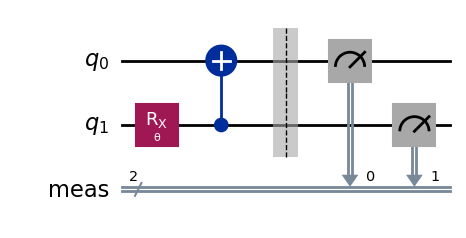

In [ ]:
from qiskit.circuit import Parameter

theta = Parameter('θ')
qc2 = QuantumCircuit(2)
qc2.rx(theta, 1)
qc2.cx(1, 0)
qc2.measure_all()
qc2.draw('mpl')

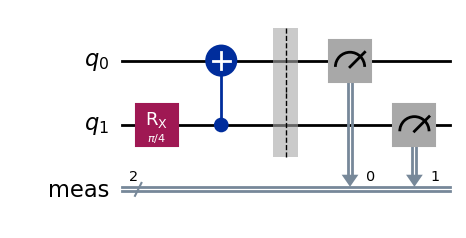

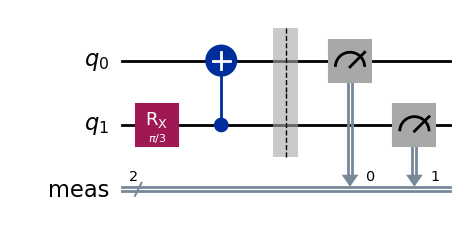

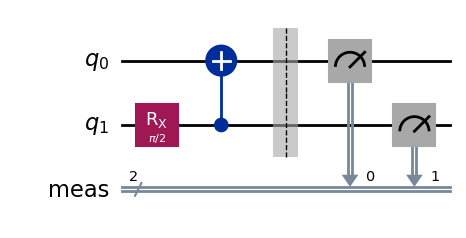

In [ ]:
from math import pi

angles = [[pi/4], [pi/3], [pi/2]]
circuits = []
for angle in angles:
  qc_temp = qc2.assign_parameters({theta: angle[0]})
  circuits.append(qc_temp)

for i in range(len(angles)):
  display(circuits[i].draw('mpl'))

In [ ]:
circuits_tranpiled = transpile(circuits, backend=simulator_aer)
result_simulator = simulator_aer.run(circuits_tranpiled, shots=1024).result()

In [ ]:
counts_simulator = []

for i in range(len(angles)):
  result_temp = result_simulator.get_counts(i)
  counts_simulator.append(result_temp)

print(counts_simulator)

[{'11': 129, '00': 895}, {'11': 257, '00': 767}, {'00': 512, '11': 512}]


In [ ]:
result_sampler = sampler.run([(qc2, angles)], shots=1024).result()

In [ ]:
counts_sampler = []

for i in range(len(angles)):
  result_temp = result_sampler[0].data.meas.get_counts(i)
  counts_sampler.append(result_temp)

print(counts_sampler)

[{'00': 880, '11': 144}, {'00': 765, '11': 259}, {'00': 505, '11': 519}]


In [ ]:
print(result_sampler[0].data.meas.get_counts())
print(result_simulator.get_counts())

{'00': 2150, '11': 922}
[{'11': 129, '00': 895}, {'11': 257, '00': 767}, {'00': 512, '11': 512}]


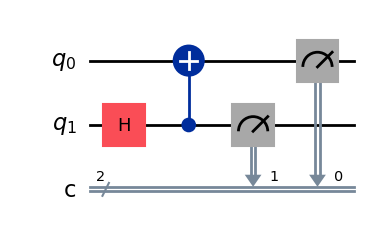

In [ ]:
qc.draw('mpl')

In [ ]:
result_smapler = sampler.run([(qc2, angles), (qc, None)], shots=1024).result()

In [ ]:
for i in range(len(angles)):
  print(f"First PUB's result with {i}th angle of the list: {result_smapler[0].data.meas.get_counts(i)}.")

print(f"Second PUB's result: {result_smapler[1].data.c.get_counts()}")

First PUB's result with 0th angle of the list: {'11': 158, '00': 866}.
First PUB's result with 1th angle of the list: {'00': 748, '11': 276}.
First PUB's result with 2th angle of the list: {'00': 547, '11': 477}.
Second PUB's result: {'00': 487, '11': 537}


In [ ]:
print(result_smapler[0].data.meas.get_counts())

{'11': 911, '00': 2161}


In [ ]:
result_smapler = sampler.run([(qc2, angles, 1024), (qc, None, 100)]).result()

In [ ]:
for i in range(len(angles)):
  print(f"First PUB's result with {i}th angle of the list: {result_smapler[0].data.meas.get_counts(i)}.")

print(f"Second PUB's result: {result_smapler[1].data.c.get_counts()}")

First PUB's result with 0th angle of the list: {'00': 888, '11': 136}.
First PUB's result with 1th angle of the list: {'00': 787, '11': 237}.
First PUB's result with 2th angle of the list: {'11': 505, '00': 519}.
Second PUB's result: {'00': 49, '11': 51}


In [ ]:
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)
qc.x(0).c_if(0, 1)


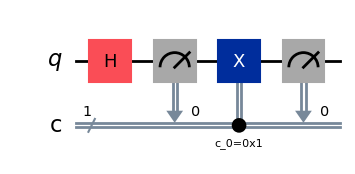

In [ ]:
qc.measure(0, 0)
qc.draw('mpl')

In [ ]:
result_smapler = sampler.run([qc], shots=1024).result()

QiskitError: 'StatevectorSampler cannot handle ControlFlowOp and c_if'

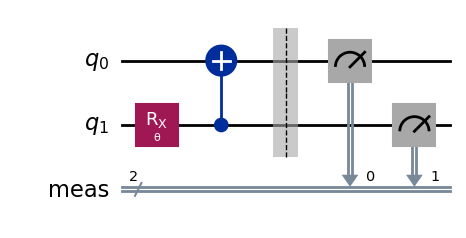

In [ ]:
qc2.draw('mpl')

In [ ]:
from qiskit.quantum_info import SparsePauliOp

obsv = [
    [SparsePauliOp(["XX", "IY"], [0.5, 0.5])],
    [SparsePauliOp(["XX"], [1])]
]

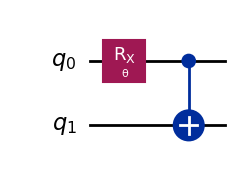

In [ ]:
qc2 = QuantumCircuit(2)
qc2.rx(theta, 0)
qc2.cx(0, 1)
qc2.draw('mpl')

In [ ]:
estimator = StatevectorEstimator()
result_estimator = estimator.run([(qc2, obsv, angles, 0.1)]).result()

In [ ]:
result_estimator[0].data.evs

array([[ 0.06136553,  0.04800748, -0.02496192],
       [-0.10627624,  0.01056106,  0.01924589]])